# Linear Algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x = np.array([1, 2, 3]) #, [-1, 0, -1]])
y = np.array([1, 2, 3])

z = np.inner(x, y) #prodotto scalare 
print(z)

x = np.array([[1, 2, 3],[-1, 0, -1]])
y = np.array([1, 2, 3])

z = np.dot(x, y) #prodotto matriciale
print(z)

14
[14 -4]


In [2]:
A = np.random.randint(4, size = (2,2))
B = np.random.randint(4, size = (2,2))

print("A = \n", A)
print("B = \n", B)

A = 
 [[3 0]
 [2 3]]
B = 
 [[3 1]
 [2 0]]


In [3]:
A.T

array([[3, 2],
       [0, 3]])

In [4]:
np.dot(A, B)

array([[ 9,  3],
       [12,  2]])

In [5]:
print("Det =", np.linalg.det(A) )
inv = np.linalg.inv(A)
print(inv)
print(np.dot(inv,A))

Det = 9.000000000000002
[[ 0.33333333  0.        ]
 [-0.22222222  0.33333333]]
[[1. 0.]
 [0. 1.]]


In [6]:
A = np.array([[2, 1],[2, 1,]])
print("Det =", np.linalg.det(A) )
np.linalg.inv(A) #singular matrix = matrice non invertibile con determinante nullo

Det = 0.0


LinAlgError: Singular matrix

# Normal distribution

<IPython.core.display.Javascript object>


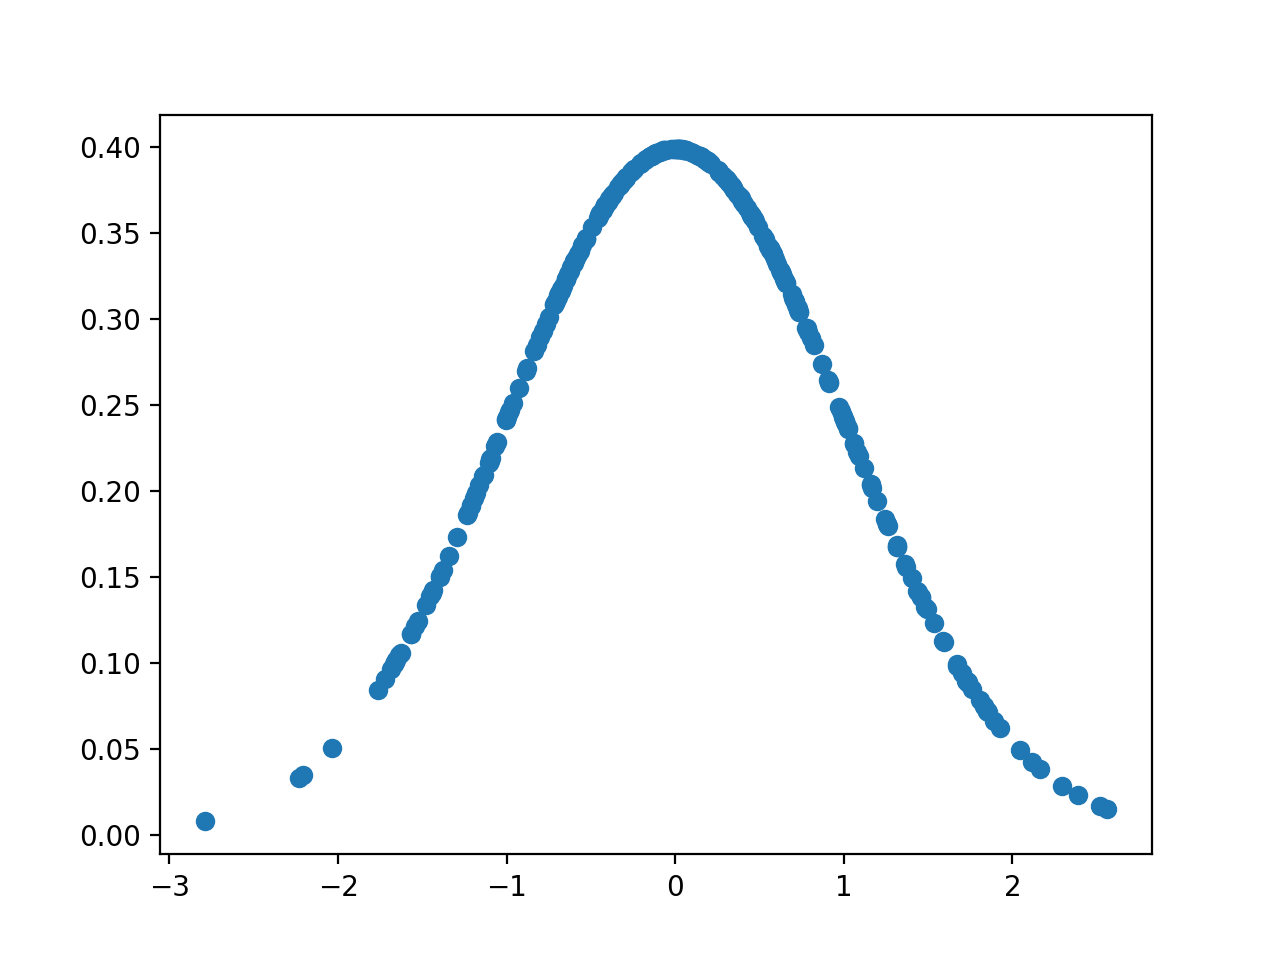

In [7]:
from scipy.stats import norm

x = np.random.normal(loc = 0, scale = 1, size = 300)

y = norm.pdf(x, loc = 0, scale = 1)

plt.figure()
plt.scatter(x, y)

<IPython.core.display.Javascript object>


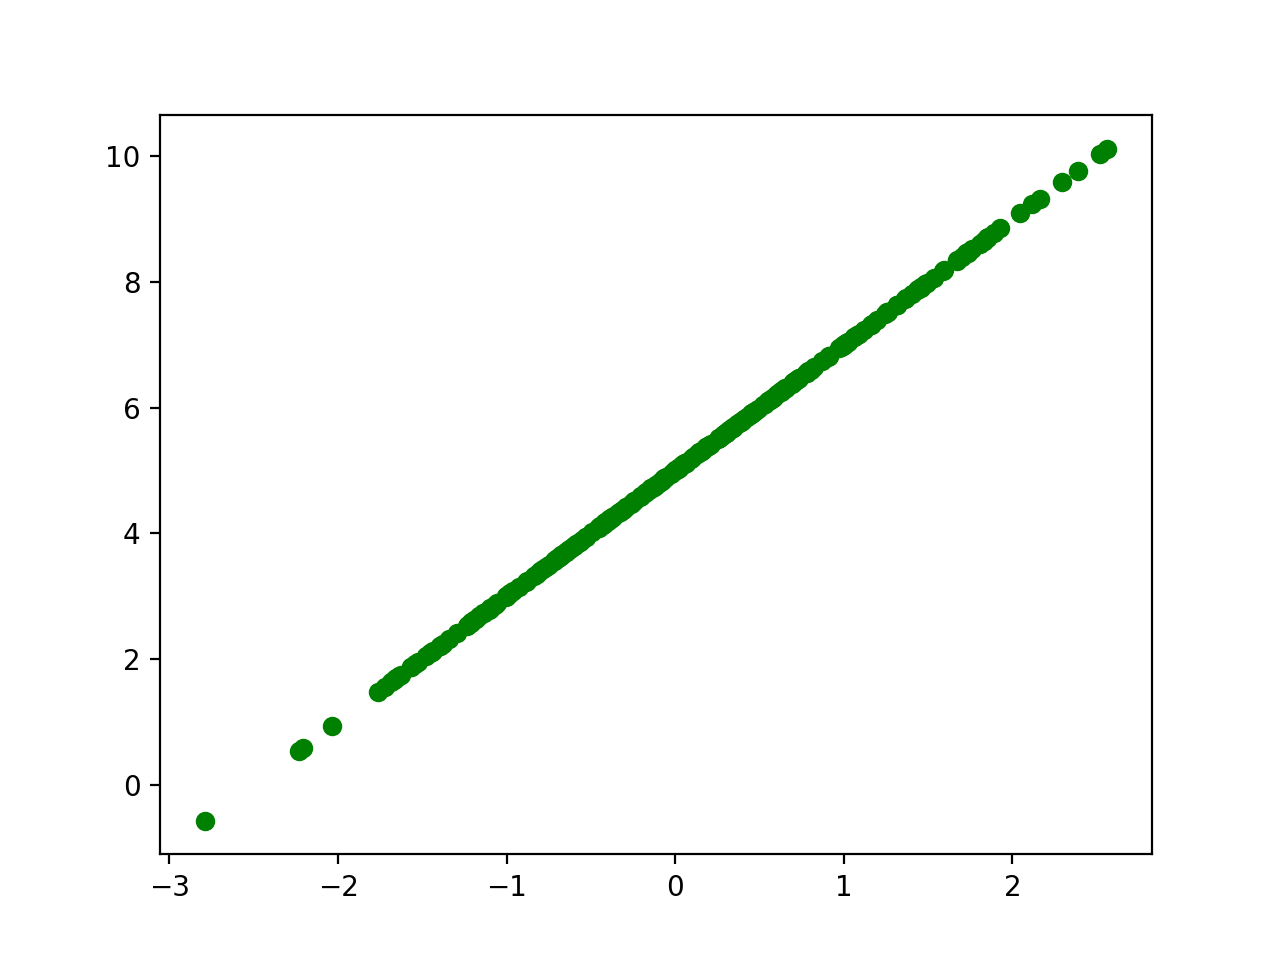

In [8]:
y = 2 * x + 5

plt.figure()
plt.scatter(x, y, color = "green")

# Linear regression with closed form solution

(500, 1)
(500, 1)
(500, 1)
(500, 2)
[[1.04483629]
 [1.98563217]]


<IPython.core.display.Javascript object>


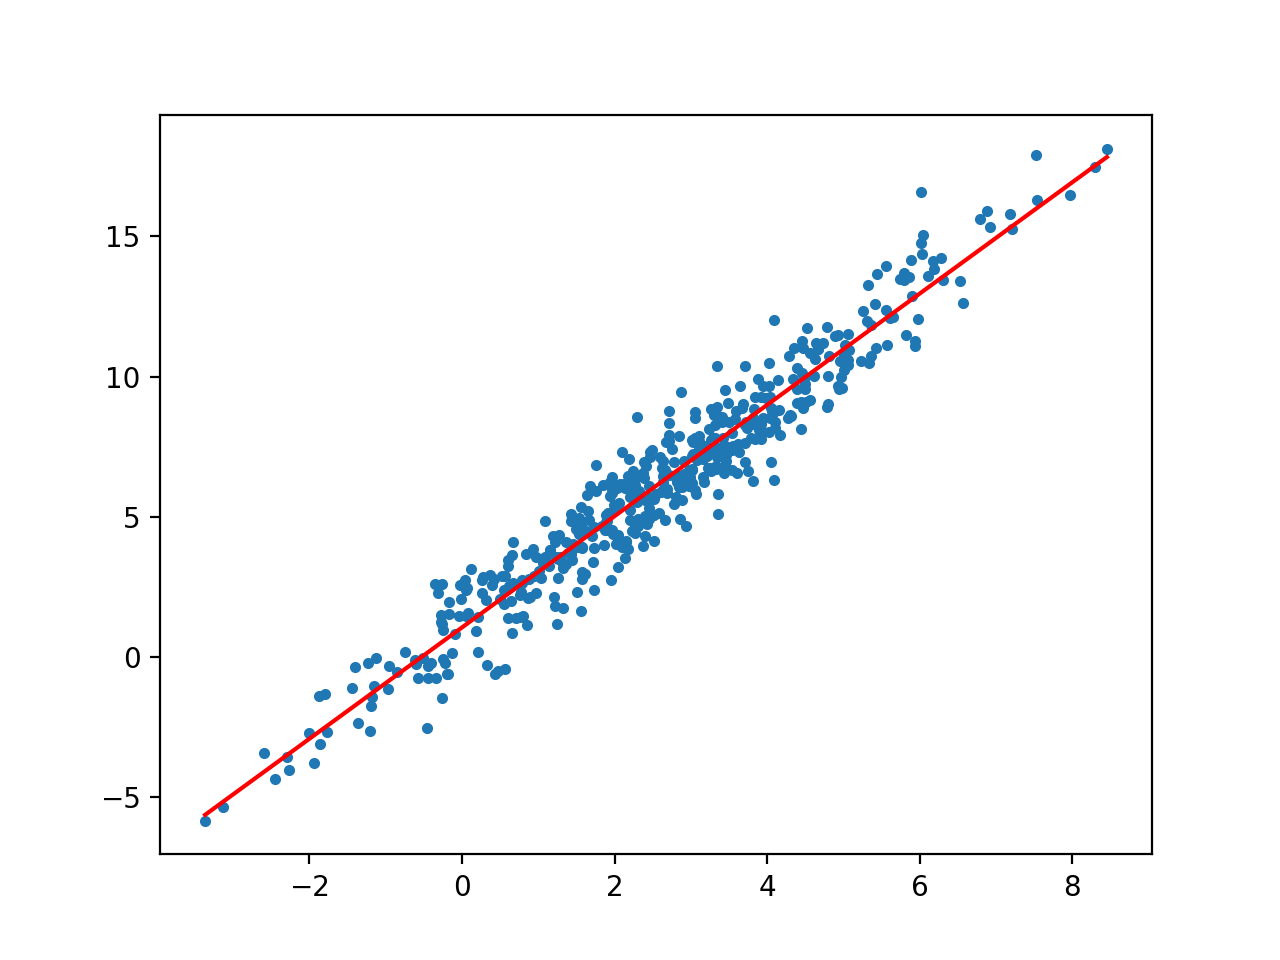

In [9]:
np.random.seed(143)

# size del training set
N = 500

# genero i punti: asse x 
x = np.random.normal(loc=2.5, scale=2.0, size=(N,1))
print(x.shape)

# genero i punti: asse y (target)
y = 2 * x + 1 + np.random.randn(N, 1)
print(y.shape)

# genero x_0=1, necessario per considerare il termine di bias
x_0 = np.ones((N, 1))
print(x_0.shape)

# creo la design matrix X includendo x_0
X = np.hstack((x_0, x))
print(X.shape)

# calcolo modello w = (X^T X)^-1 X^T y
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

print(w)

plt.figure()
plt.scatter(x, y, marker='.')

xmin = x.min()
xmax = x.max()

plt.plot([xmin, xmax], [xmin * w[1] + w[0], xmax * w[1] + w[0]], color='red')

<IPython.core.display.Javascript object>


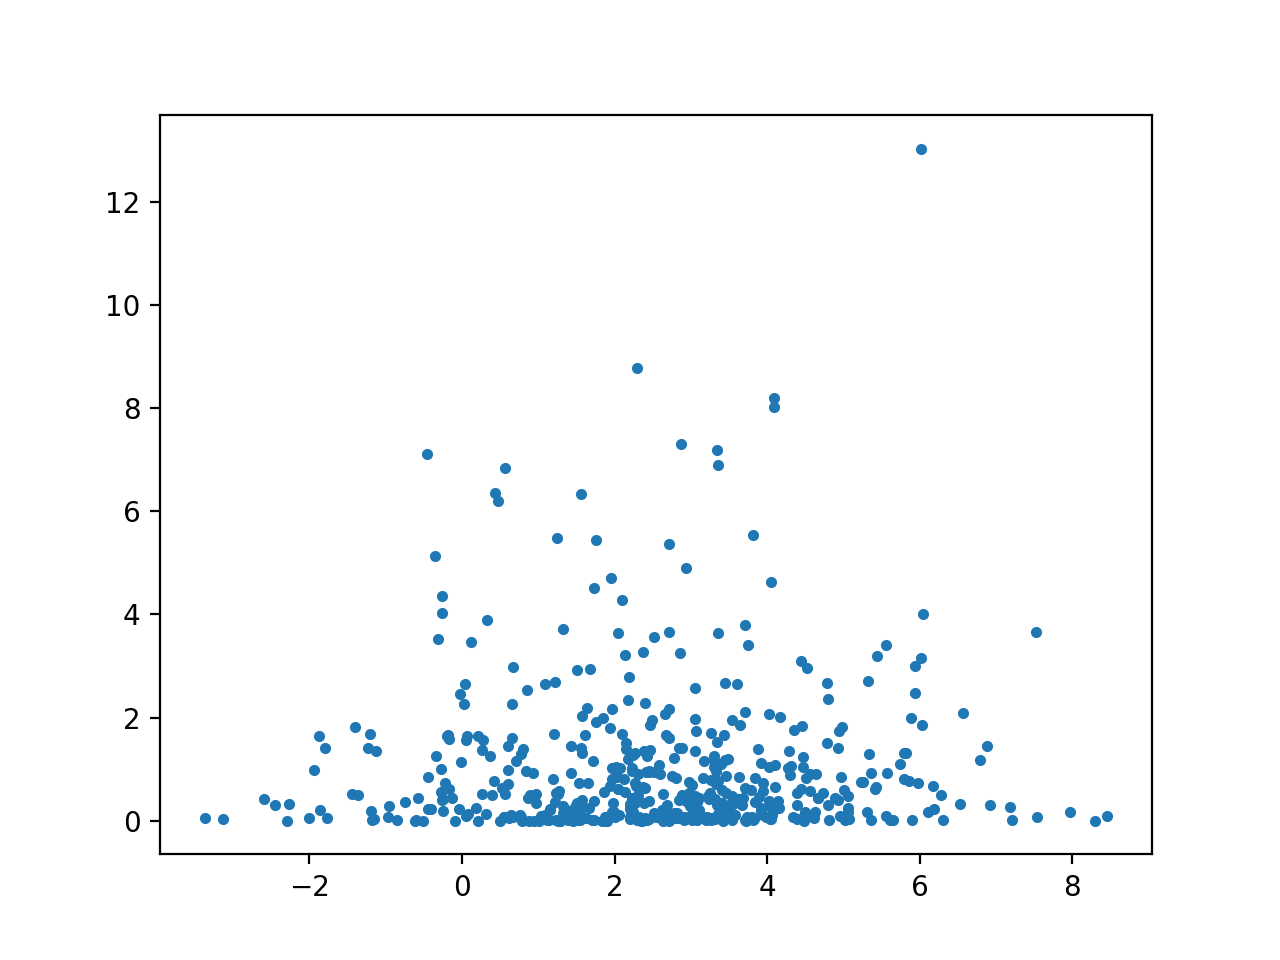

In [10]:
# calcolo squared error per ogni singolo punto 
errors = (x * w[1] + w[0] - y)**2

plt.figure()
plt.scatter(x, errors, marker = '.')

# Linear regression using scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression

print('Method: closed form')
print(f'Intercept: {w[0]}, coeff: {w[1]}') 

print('Method: sklearn.linear_model.LinearRegression')
lr_model = LinearRegression()
lr_model.fit(x, y) #passiamo il training data, non la design matrix
print(f'Intercept: {lr_model.intercept_}, coeff: {lr_model.coef_}')

print("Score on (full) training dataset: ",lr_model.score(x, y))

Method: closed form
Intercept: [1.04483629], coeff: [1.98563217]
Method: sklearn.linear_model.LinearRegression
Intercept: [1.04483629], coeff: [[1.98563217]]
Score on (full) training dataset:  0.9362567536773807


In [12]:
from sklearn.model_selection import train_test_split
#splitto il dataset in training data e test data
train_data, test_data, train_labels, test_labels = train_test_split(x,y,test_size=0.2)

lr_model.fit(train_data, train_labels)
print("Score on train data: ",lr_model.score(train_data, train_labels))
print("Score on test data: ",lr_model.score(test_data, test_labels))

Score on train data:  0.9421458243478369
Score on test data:  0.9082847488615504


<IPython.core.display.Javascript object>


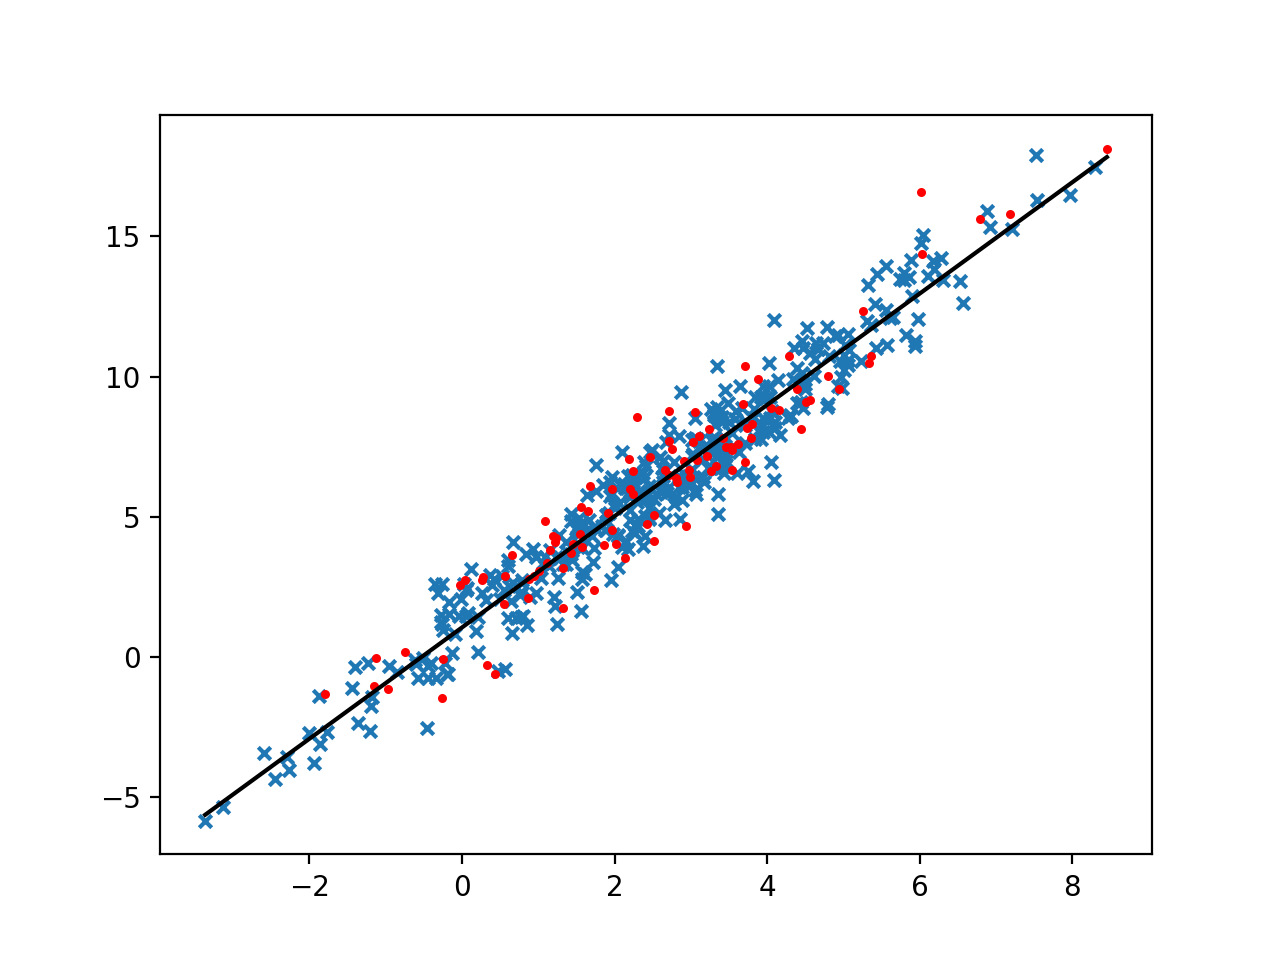

In [13]:
w_0 = lr_model.intercept_ 
w_1 = lr_model.coef_[0][0]

plt.figure()
plt.scatter(train_data, train_labels, marker='x', s=20)
plt.scatter(test_data, test_labels, marker='.', color='red', s=20)
plt.plot([xmin, xmax], [xmin * w[1] + w[0], xmax * w[1] + w[0]], color='black')